In [3]:
from queue import PriorityQueue
import pandas as pd
import heapq as hq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from collections import OrderedDict
from common.utility import Node
from common.utility import dijkstra
import time
import argparse

In [4]:
%cd ..

/Users/jonasarentoft/Desktop/bachelor2023/src


In [5]:
FILEPATH = f'../data/processed'

nodesAndPositions = OrderedDict()

with open(f'{FILEPATH}/nodesAndPositions.txt', 'r') as nodes:
    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        # coords.append(list[1:])
        # nodeIDs.append(list[0])'
        
        nodesAndPositions[list[0]] = [list[2], list[1]]
        
        
myNodes = {}

with open(f'{FILEPATH}/nodesInHighwaysSorted.txt', 'r') as nodes:
    for ID in nodes:
        ID = int(ID)
        myNodes[ID] = Node(ID)
    
        
        
with open(f'{FILEPATH}/edgesWithDistances.txt', 'r') as edges:   
    for line in edges:
        data = [i for i in line.split(sep=",")]
        fromID, toID, distance = data        
        fromID = int(fromID)
        toID = int(toID)
        distance = float(distance)
        
        # Get Objects
        fromNode = myNodes[fromID]
        toNode =  myNodes[toID]
    
        Node.add_edge(fromNode, toNode, distance)

In [6]:
def dijkstra(start):
    heap = []
    
    distances = {}
    previous = {}
    
    distances[start] = 0

    hq.heappush(heap, (distances[start], start))

    while heap:

        current = hq.heappop(heap)
        
        distance, node = current
        #print([e for e in current])
        

        # check if the nodes has been updated
        if distance != distances[node]:
            continue

        for e in node.edges:
            
            edgeNode, edgeDistance = e
            
            new_distance = distances[node] + edgeDistance

            if distances.get(edgeNode) is None or new_distance < distances[edgeNode]:
                
                # opdater dictionary
                distances[edgeNode] = new_distance
                previous[edgeNode.value] = node.value
                
                hq.heappush(heap, (new_distance, edgeNode))
                
    return distances, previous

In [7]:
def GetPath(target, previousDict):
    previous = previousDict.get(target)
    
    if previous is None:
        return []
    
    else:
        return [target] + GetPath(previous, previousDict)
    

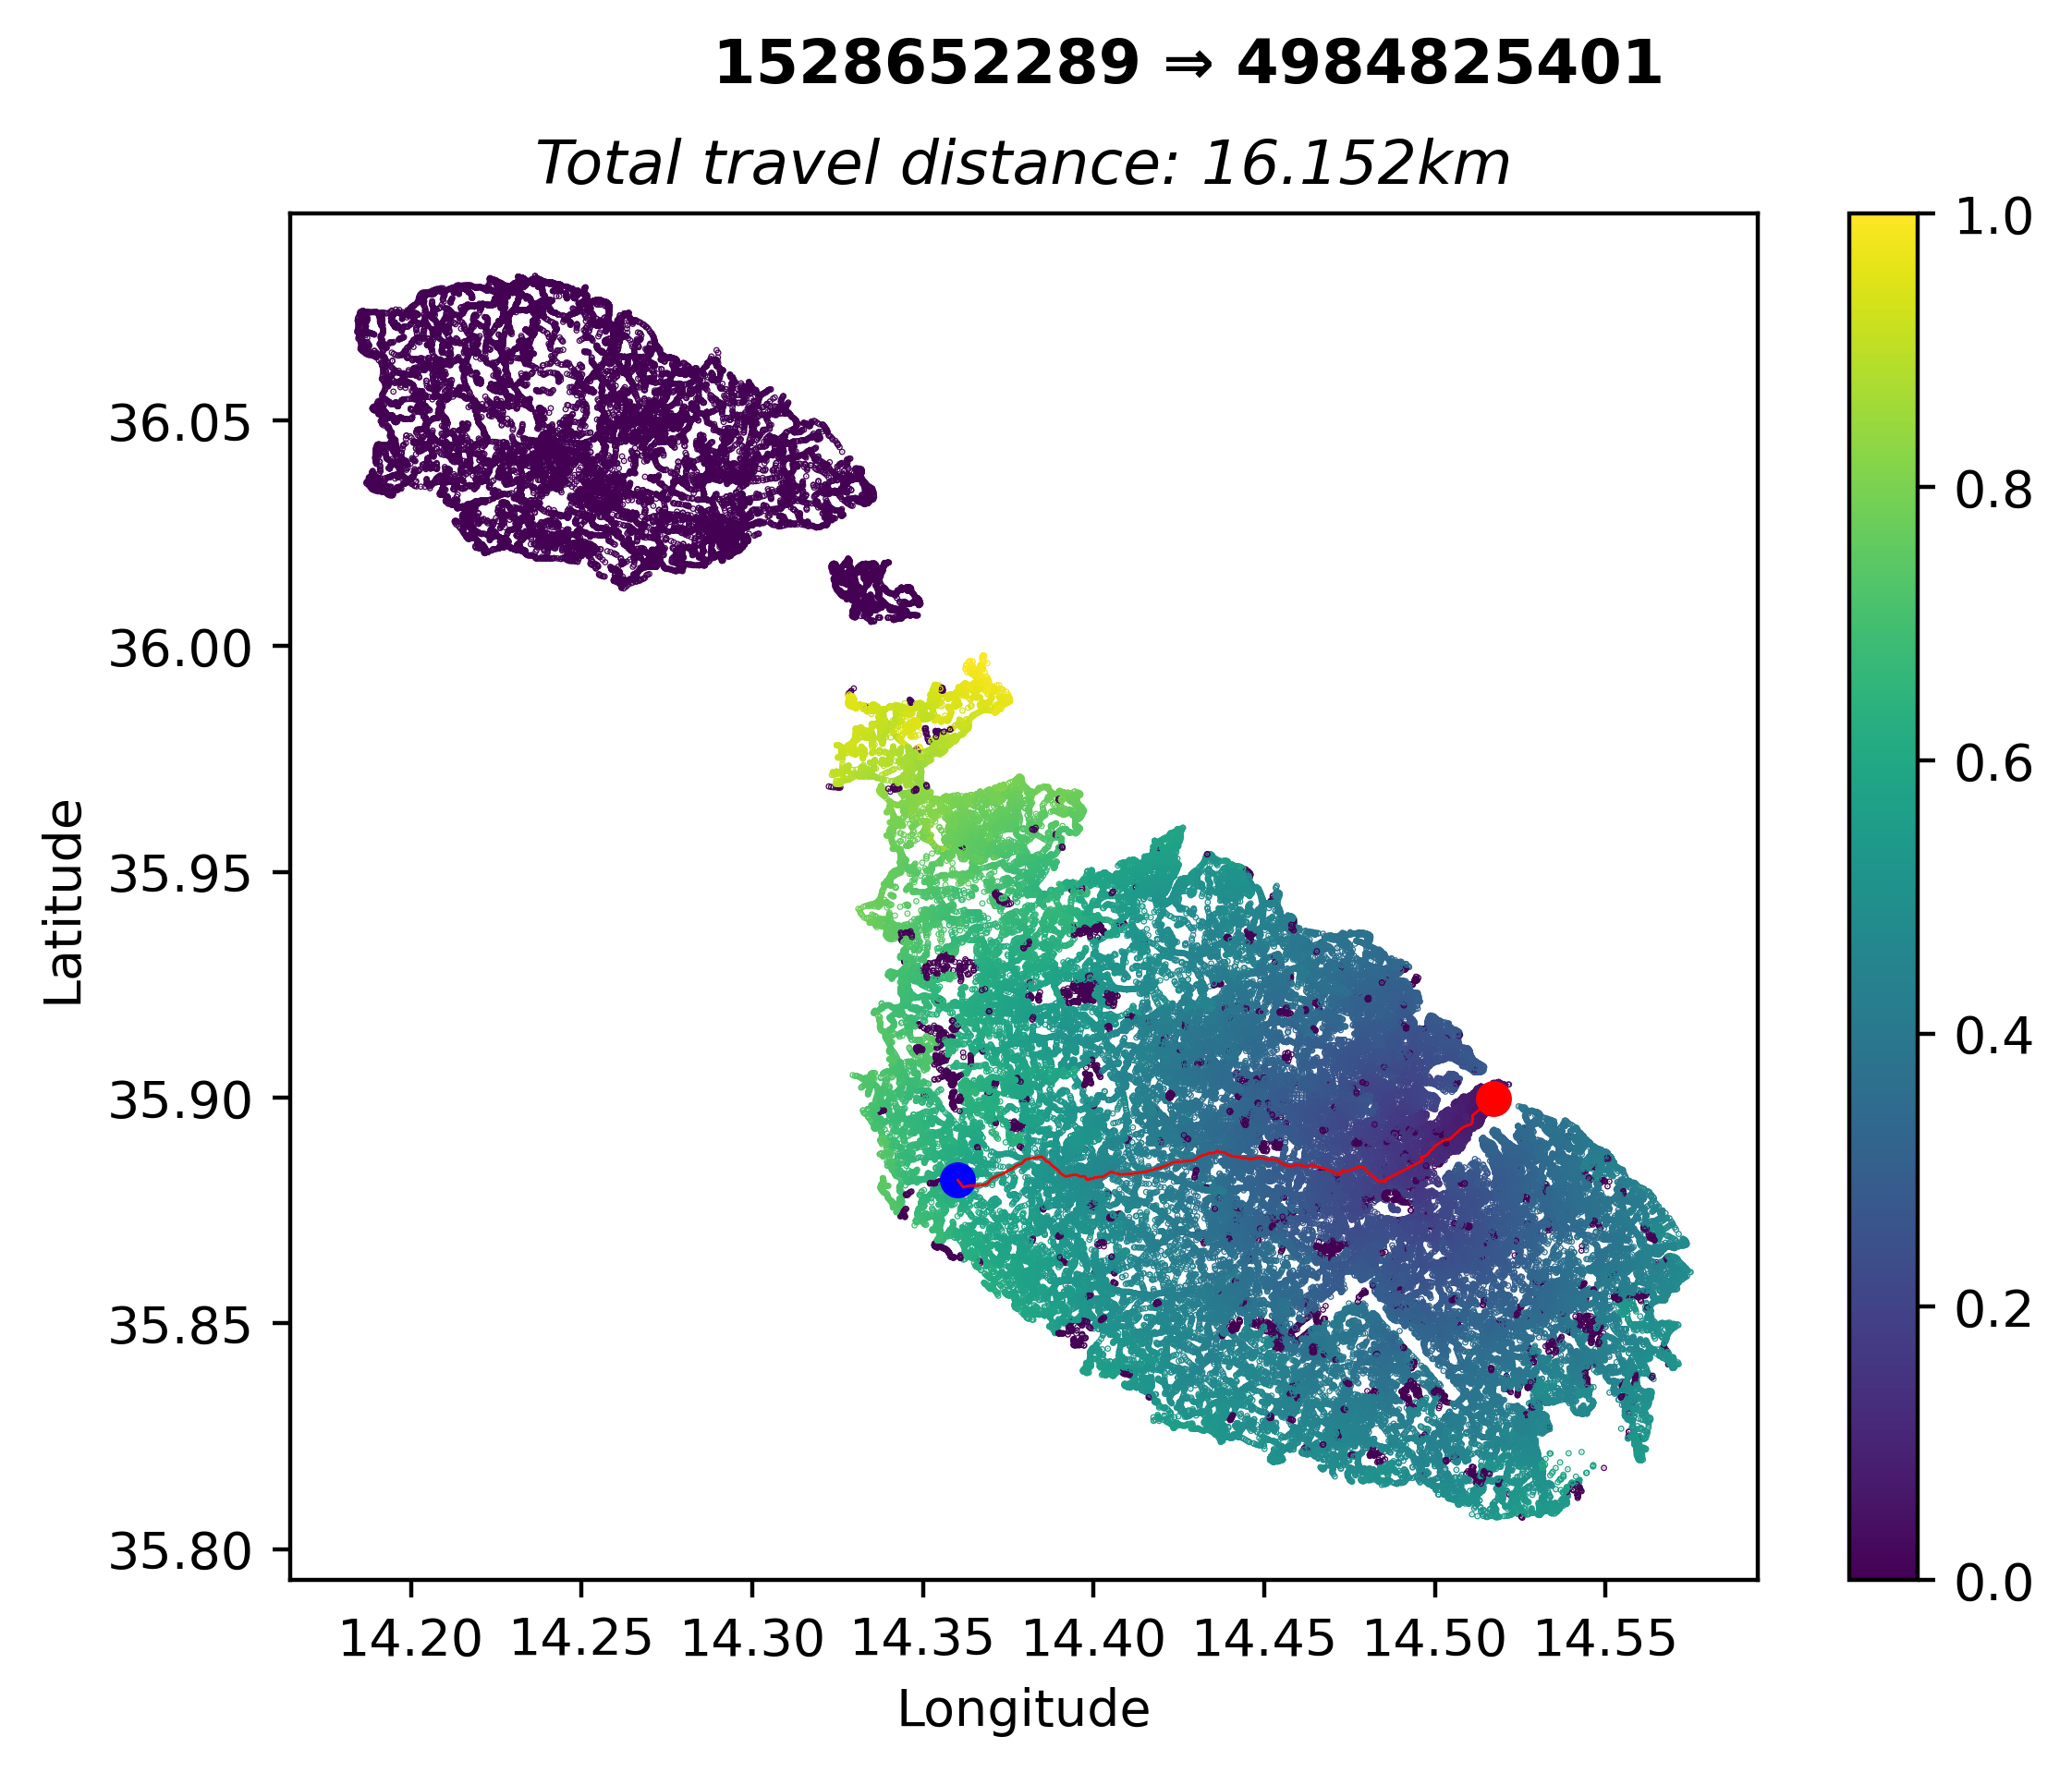

In [10]:
wantedStartNode = 1528652289
wantedEndNode = 4984825401
    
distancesDict, previousDict = dijkstra(myNodes[wantedStartNode])
distances = [distancesDict.get(myNodes[ID], -1) for ID in nodesAndPositions.keys()]


coords = nodesAndPositions.values()
wantedStartNodeCoords = nodesAndPositions[wantedStartNode]
wantedEndNodeCoords = nodesAndPositions[wantedEndNode]
nodesInShortestPath = GetPath(wantedEndNode, previousDict)
totalDistance = distancesDict.get(myNodes[wantedEndNode])
totalDistance = round(totalDistance, 3)

positionsOfNodesInShortesPath = [nodesAndPositions[node] for node in nodesInShortestPath]

plt.rcParams['figure.dpi'] = 400


plt.suptitle(f' {wantedStartNode} ⇒ {wantedEndNode}', fontweight = 'bold')



if positionsOfNodesInShortesPath:
    plt.title(f'Total travel distance: {totalDistance}km', style = 'italic', fontsize = 12, )
else:
    plt.title(f'Found no path', style = 'italic')
plt.scatter(*zip(*coords), s = 0.05, c = distances)
plt.plot(*zip(*positionsOfNodesInShortesPath), linewidth = 0.5, color = 'red')
plt.scatter(wantedStartNodeCoords[0], wantedStartNodeCoords[1], c = 'red')
plt.scatter(wantedEndNodeCoords[0], wantedEndNodeCoords[1], c = 'blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.savefig('../data/plots/myPlot.png')
